# Regresion tree

Lucky for us, the algorithm used for training a regression decision tree is very similar to the one we used for training a classification decision tree. The only difference is that for classification trees, we used accuracy, Gini index, or entropy, and for regression trees, we use the mean square error (MSE).

## MSE

Left dataset: users younger than 65. The labels are {7, 5, 7, 1, 2, 1}.

Right dataset: users 65 or older. The labels are {5, 4}.

For each dataset, we predict the average of the labels, which is 3.833 for the left one and 4.5 for the right one. Thus, the prediction for the first six users is 3.833, and for the last two is 4.5. Now, we calculate the MSE as follows:

MSE = (1 / 8) * [ (7 - 3.833)^2 + (5 - 3.833)^2 + (7 - 3.833)^2 + (1 - 3.833)^2 + (2 - 3.833)^2 + (1 - 3.833)^2 + (5 - 4.5)^2 + (4 - 4.5)^2 ] = 5.167

| Cutoff | Labels left set       | Labels right set            | Prediction left set  | Prediction right set   | MSE    |
|--------|-----------------------|---------------------------- |----------------------|------------------------|--------|
| 0      | {}                    | {7,5,7,1,2,1,5,4}           | None                 | 4.0                    | 5.25   |
| 15     | {7}                   | {5,7,1,2,1,5,4}             | 7.0                  | 3.571                  | 3.964  |
| 25     | {7,5}                 | {7,1,2,1,5,4}               | 6.0                  | 3.333                  | 3.917  |
| 35     | {7,5,7}               | {1,2,1,5,4}                 | 6.333                | 2.6                    | 1.983  |
| 45     | {7,5,7,1}             | {2,1,5,4}                   | 5.0                  | 3.0                    | 4.25   |
| 55     | {7,5,7,1,2}           | {1,5,4}                     | 4.4                  | 3.333                  | 4.983  |
| 65     | {7,5,7,1,2,1}         | {5,4}                       | 3.833                | 4.5                    | 5.167  |
| 75     | {7,5,7,1,2,1,5}       | {4}                         | 4.0                  | 4.0                    | 5.25   |
| 100    | {7,5,7,1,2,1,5,4}     | {}                          | 4.0                  | None                   | 5.25   |


The best cutoff is at 35 years old, because it gave us the prediction with the least mean square error. Thus, we’ve built the first decision node in our regression decision tree. The next steps are to continue splitting the left and right datasets recursively in the same fashion. Instead of doing it by hand, we’ll use Scikit-Learn as before.

[Text(0.5, 0.8333333333333334, 'Age <= 35.0\nsquared_error = 5.25\nsamples = 8\nvalue = 4.0'),
 Text(0.25, 0.5, 'Age <= 15.0\nsquared_error = 0.889\nsamples = 3\nvalue = 6.333'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 7.0'),
 Text(0.375, 0.16666666666666666, 'squared_error = 1.0\nsamples = 2\nvalue = 6.0'),
 Text(0.75, 0.5, 'Age <= 65.0\nsquared_error = 2.64\nsamples = 5\nvalue = 2.6'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.222\nsamples = 3\nvalue = 1.333'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.25\nsamples = 2\nvalue = 4.5')]

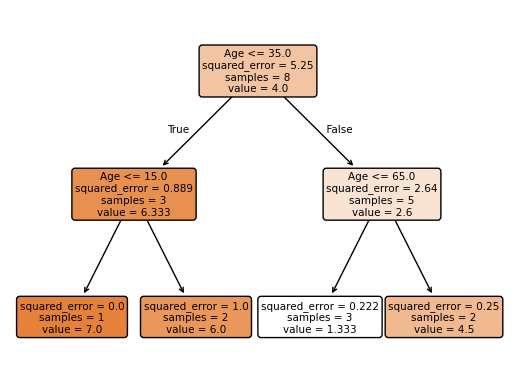

In [7]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree
import numpy as np

features = [[10],[20],[30],[40],[50],[60],[70],[80]]
labels = [7,5,7,1,2,1,5,4]


dt_regressor = DecisionTreeRegressor(max_depth=2)
dt_regressor.fit(features, labels)

sklearn.tree.plot_tree(dt_regressor, feature_names=["Age"], filled=True, rounded=True)


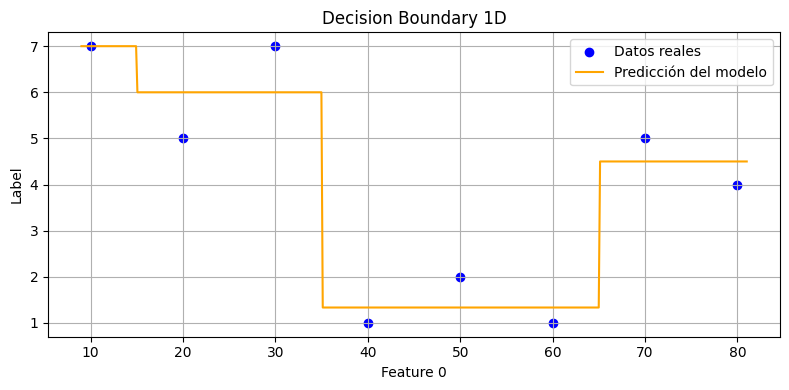

In [1]:
import _plotting
import numpy as np

from sklearn.tree import DecisionTreeRegressor

features = np.array([[10],[20],[30],[40],[50],[60],[70],[80]])
labels = [7,5,7,1,2,1,5,4]

model = DecisionTreeRegressor(max_depth=2)
model.fit(features, labels)

_plotting.plot_decision_boundary_1D(features, labels, model, label_type="regression")